# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Importing Dataset

In [2]:
file_train = pd.read_csv('TRAIN2.csv')
file_test = pd.read_csv('Test.csv')

In [3]:
file_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


# Selecting Best Features

In [4]:
file_train.corr().sum()

Id                0.867500
MSSubClass        0.502658
LotFrontage       6.279505
LotArea           4.575620
OverallQual       9.910221
OverallCond      -0.982140
YearBuilt         6.506246
YearRemodAdd      6.739078
MasVnrArea        6.436896
BsmtFinSF1        5.039739
BsmtFinSF2        0.879727
BsmtUnfSF         2.993672
TotalBsmtSF       8.578697
1stFlrSF          8.690109
2ndFlrSF          5.641735
LowQualFinSF      0.856181
GrLivArea        11.158176
BsmtFullBath      3.082606
BsmtHalfBath      0.799514
FullBath          8.692677
HalfBath          4.799244
BedroomAbvGr      4.869218
KitchenAbvGr      0.550042
TotRmsAbvGrd      9.105281
Fireplaces        6.765284
GarageYrBlt       6.588106
GarageCars        8.949361
GarageArea        8.923901
WoodDeckSF        4.859243
OpenPorchSF       5.324573
EnclosedPorch    -1.063575
3SsnPorch         1.346992
ScreenPorch       2.129487
PoolArea          2.875804
MiscVal           0.924868
MoSold            1.488082
YrSold            0.499895
S

In [5]:
feat = file_train[['GrLivArea']]
label = file_train[['SalePrice']]

testing = file_test[['GrLivArea']]

In [6]:
feat = feat.iloc[:1459]
label = label.iloc[:1459]

# Model Training

In [7]:
lnr = LinearRegression()

In [8]:
lnr.fit(feat,label)

LinearRegression()

# Accuracy

In [9]:
lnr_acc = lnr.score(feat, label)*100

# Prediction Plotting

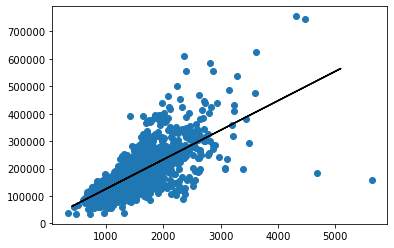

In [10]:
for i in feat:
    plt.scatter(feat[i], label)
    plt.plot(testing, lnr.predict(testing), color = 'black')

# Multivariant Regression

# Selecting Multiple Features

In [11]:
x = file_train[['OverallQual','1stFlrSF','FullBath','GarageCars','GarageArea','GrLivArea']]
y = file_train['SalePrice']
multi_testing = file_test[['OverallQual','1stFlrSF','FullBath','GarageCars','GarageArea','GrLivArea']]

# Filling NaN values

In [12]:
multi_testing.fillna(multi_testing.mean(), inplace = True)

C:\Users\DeeP_LeaRneR\anaconda3_Tariq_Ullah\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [13]:
x = x.iloc[:1459,:]
y = y.iloc[:1459]

# Training Model

In [14]:
multi = LinearRegression()

In [15]:
multi.fit(x,y)

LinearRegression()

# Accuracy

In [16]:
multi_acc = multi.score(x,y)*100

# Prediction Plotting

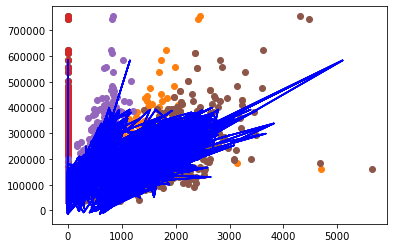

In [17]:
for i in x:
    plt.scatter(x[i], y)
    plt.plot(multi_testing, multi.predict(multi_testing), color = 'blue')

# Polynomial Regression

In [18]:
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

# Selecting Features

In [26]:
X = file_train[['OverallQual','1stFlrSF','FullBath','GarageCars','GarageArea','GrLivArea']]
Y = file_train['SalePrice']
poly_testing = file_test[['OverallQual','1stFlrSF','FullBath','GarageCars','GarageArea','GrLivArea']]

# Reshaping

In [27]:
X = np.array(X)
Y = np.array(Y)
X = x.reshape(-1,1)
Y = y.reshape(-1,1)

# Scalling

In [28]:
scaler = StandardScaler()

In [29]:
X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y)

# PolynomialFeatures

In [30]:
ps = PolynomialFeatures(degree = 2)

In [32]:
X = ps.fit_transform(X)

# Model Training

In [33]:
lsc = LinearRegression()

In [35]:
lsc.fit(X, Y)

LinearRegression()

# Accuracy

In [51]:
poly_acc = lsc.score(X, Y)*100

# DataFrame OF Models Accuracy

In [53]:
import seaborn as sb

In [54]:
acc = {'Accuracy' : [lnr_acc,multi_acc,poly_acc]}
index = ["Linear Model Accuracy","Multi Model Accuracy","Polynomial Model Accuracy"]
df = pd.DataFrame(acc, index = index)
df

,Accuracy
Linear Model Accuracy,50.209165
Multi Model Accuracy,75.670265
Polynomial Model Accuracy,100.000000


# Heatmap For DataFrame

<AxesSubplot:>

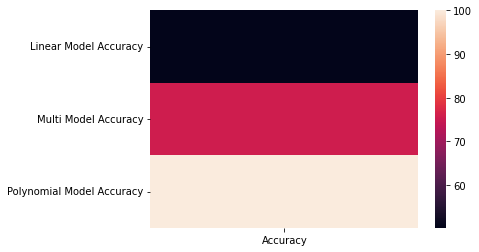

In [55]:
sb.heatmap(df)